In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
t1 = pd.read_csv('./enrich/VSMC1/Enrichment_GO/_FINAL_GO.csv',sep=',')
t2 = pd.read_csv('./enrich/VSMC2/Enrichment_GO/_FINAL_GO.csv',sep=',')
t3 = pd.read_csv('./enrich/VSMC3/Enrichment_GO/_FINAL_GO.csv',sep=',')
# t1['_LogP_MyList'] = np.absolute( t1['_LogP_MyList'])

# t2 = t2.loc[:,['Description','_LogP_MyList']]
# t2['_LogP_MyList'] = np.absolute( t2['_LogP_MyList'])

# t3 = t3.loc[:,['Description','_LogP_MyList']]
# t3['_LogP_MyList'] = np.absolute(t3['_LogP_MyList'])



In [15]:

t1 = t1.loc[:,['Description','Enrichment','Hits']]
t1['Enrichment'] = np.absolute( t1['Enrichment'])
# t1 = t1.set_index('Description')

t2 = t2.loc[:,['Description','Enrichment','Hits']]
t2['Enrichment'] = np.absolute( t2['Enrichment'])
# t2 = t2.set_index('Description')

t3 = t3.loc[:,['Description','Enrichment','Hits']]
t3['Enrichment'] = np.absolute(t3['Enrichment'])
# t3 = t3.set_index('Description')



In [16]:
t1.columns = ['Description', 'VSMC1_s', 'VSMC1_Hits']
t2.columns = ['Description', 'VSMC2_s', 'VSMC2_Hits']
t3.columns = ['Description', 'VSMC3_s', 'VSMC3_Hits']

In [17]:
df_inter = t1.merge(t2, how='inner',on=['Description']).merge(t3, how='inner', on='Description')
df_inter = df_inter.set_index('Description')
df_inter = df_inter.loc[list(set(df_inter.index)),:]
df_inter = df_inter.drop_duplicates(subset=None, keep=False, inplace=False)

In [18]:
inter = list(df_inter.index)

In [19]:
interst1 =[
'extracellular structure organization',
    'Extracellular matrix organization',
    'blood vessel development',
    'regulation of endothelial cell proliferation',
    'connective tissue development',
    'cellular response to growth factor stimulus',
    'PI3K-Akt signaling pathway',
    'circulatory system process'
]

In [20]:
df_inter['des'] = list(df_inter.index)
df_inter = df_inter.drop_duplicates(subset='des')

In [21]:
df_inter.to_csv('./enrich/pathways_inter_VSMC.csv')
# htmp.to_csv('./enrich/pathways_interest.csv')


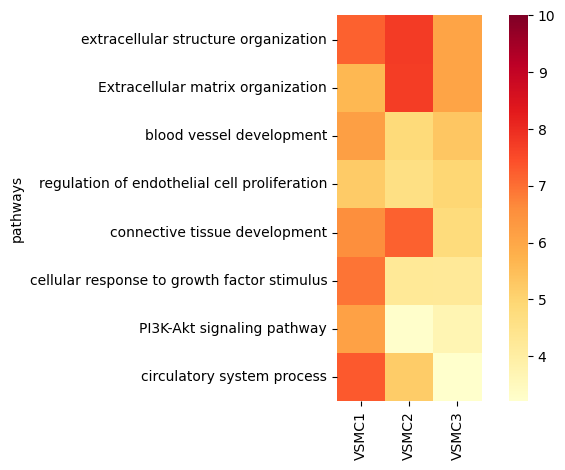

In [22]:
fig = plt.figure()
interst = interst1 
htmp = pd.DataFrame(columns=['pathways','VSMC1', 'VSMC2', 'VSMC3','VSMC1_Hits','VSMC2_Hits','VSMC3_Hits'])
htmp['pathways'] = interst1
# htmp['Fib1'] = list(t1.loc[interst, '_LogP_MyList'])
# htmp['Fib2'] = list(t2.loc[interst, '_LogP_MyList'])
# htmp['Fib3'] = list(t3.loc[interst, '_LogP_MyList'])

htmp['VSMC1'] = list(df_inter.loc[interst, 'VSMC1_s'])
htmp['VSMC2'] = list(df_inter.loc[interst, 'VSMC2_s'])
htmp['VSMC3'] = list(df_inter.loc[interst, 'VSMC3_s'])
htmp['VSMC1_Hits'] = list(df_inter.loc[interst,'VSMC1_Hits'])
htmp['VSMC2_Hits'] = list(df_inter.loc[interst,'VSMC2_Hits'])
htmp['VSMC3_Hits'] = list(df_inter.loc[interst,'VSMC3_Hits'])
htmp = htmp.set_index('pathways')
sns.heatmap(htmp.iloc[:,:3],cmap='YlOrRd',square=True,vmax=10)
plt.tight_layout()

plt.savefig('./figures/pathways_hp_VSMC.jpg',dpi=400, )

In [ ]:
def find_gene(x, gene='NEGR1'):
    x = list(x)
#     print(x[1].split('|'))

    if gene in x[1].split('|'):
        return True
    elif gene in x[3].split('|'):
        return True
    elif gene in x[5].split('|'):
        return True
    else:
        return False

In [21]:
df_inter['NEGR1'] = df_inter.apply(find_gene, axis=1)

In [22]:
df_inter[df_inter['NEGR1']].to_csv('./enrich/NEGR1_pathways.csv')